# This notebook demonstrates how to use Chachifuncs.py - which is used to clean raw battery data from the CALCE website 
#### Calce website: https://www.calce.umd.edu/batteries/data.htm

### First we import everything we need:

In [14]:
import databasewrappers as dbw
import databasewrappers_forjupyter as dbfj
import chachifuncs as ccf
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sqlite3 as sql
import peakutils
%matplotlib inline

### Adding users to the database:

In [10]:
df = pd.DataFrame(data = [['user1', 'password1'], ['user2', 'password2'], ['user3', 'password3']],columns = ['Username', 'Password'])
df

,Username,Password
0,user1,password1
1,user2,password2
2,user3,password3


In [17]:
# enter the database you wish to add the username/password pairs to:
database_name = 'dQdVDB.db'
con = sql.connect(database_name)
c = con.cursor()
# add the dataframe created above wiht the users and passwords to the db
# if a table named "users" already exists, it will be replaced with this one
df.to_sql('users', con, if_exists="replace")

## Processing Data Through the Notebook

### We apply the process_data function, which takes raw data and cleans it, builds and fits a model, and generates cycle descriptors

Filename must not have "Cycle" anywhere in it- as this is how the program splits up cycle numbers later on. 

A few print messages should appear while this function is running: 
1. That database doe not exist-creating it now (only if the database doesn't exist yet).
2. Processing that data.
3. All data separated into cycles and saved in database.  
4. All cycles cleaned and saved in database.  
5. All clean cycles recombined and saved in database.
6. Database updated with descriptors. 

If no peaks were found for a certain cycle, there will be a print message stating so, before indicating the database has been updated with descriptors. 

In [15]:
database = 'dQdVDB.db'
path = 'data/example_files/Raw_Data_Examples/ExampleData.xlsx'
datatype = 'Arbin'
username = 'Me'

#the below is to get the variable filename
filename = path
while '/' in filename:
	filename = filename.split('/', maxsplit = 1)[1]
# cleansetname = filename.split('.')[0]+'CleanSet'
# descriptname = filename.split('.')[0]+'-descriptors'

In [16]:
dbfj.process_data(filename, database, path, datatype, username)

That database does not exist-creating it now.
Processing that data
All data separated into cycles and saved in database.
All cycles cleaned and saved in database
All clean cycles recombined and saved in database


C:\Users\Nicole\Desktop\chachies_pull012919\chachies\chachies\descriptors.py:678: RuntimeWarning:

invalid value encountered in greater



Database updated with descriptors.


In [5]:
mod_paramsgraphit = dbw.dbfs.get_file_from_database('CS2_33_10_04_10ModParams', 'mydatabase.db')
# this is where we would iterate over charge/discharge sets 
charge_df = mod_paramsgraphit[mod_paramsgraphit['C/D'] == 'discharge']
charge_df = charge_df.reset_index(drop = True)
# this is where we would iterate over rows in this 
for row  in range(len(charge_df)):
    param_dict = ast.literal_eval(charge_df.loc[row, ('Model_Parameters')])
    #print(param_dict)
    charge_keys =[]
    for key, value in param_dict.items(): 
        if '_amplitude' in key:
            #print(int(key.split('_')[0].split('a')[1]))
            charge_keys.append(key.split('_')[0])
    print(charge_keys) 
    for item in charge_keys:
        #print(item)
        center = param_dict[item + '_center']
        amp = param_dict[item + '_amplitude']
        fract = param_dict[item + '_fraction']
        sigma = param_dict[item + '_sigma']
        #print('center' + str(center))
        PeakArea, PeakAreaError = scipy.integrate.quad(my_pseudovoigt, 0.0, 100, args=(center, amp, fract, sigma))
        print('peak location is : ' + str(center) + ' Peak area is: ' + str(PeakArea))

KeyError: 'C/D'

In [ ]:
mod_paramsgraphit = dbw.dbfs.get_file_from_database('CS2_33_10_04_10_twocModParams', 'dqdvDataBase_0912APP_17.db')

In [ ]:
        coefficients = []

        for k in np.arange(4):
            # key calculation for coefficient collection
            coef = 'c' + str(k)
            # extracting coefficients from model object
            coefficients.append(model.best_values[coef])

        # creates a dictionary of coefficients
        desc = {'coefficients' + '-' +str(cd): list(coefficients)}
        sig = []
        if len(i) > 0:
            # generates numpy array for peak calculation
            sigx, sigy = fitters.cd_dataframe(V_series, dQdV_series, cd)

            # determines peak location and height locations from raw data
            desc.update({'peakLocation(V)' +'-' +str(cd): list(sigx[i].tolist(
            )), 'peakHeight(dQdV)'+'-' +str(cd): list(sigy[i].tolist())})

            # initiates loop to extract
            #sig = []
            for index in i:
                # determines appropriate string to call standard
                # deviation object from model
                center, sigma, amplitude, fraction, comb = fitters.label_gen(index)
                sig.append(model.best_values[sigma])
        else:
            desc.update({'peakLocation(V)' + '-' + str(cd): list([np.NaN]), 'peakHeight(dQdV)' + '-' + str(cd): list([np.NaN])})
            #pass

            # updates dictionary with sigma key and object
        desc.update({'peakSIGMA'+ '-' +str(cd): list(sig)})
        # print('Here is the desc within the descriptor_func function: ')
        # print(desc)
        # adds keys for the error parameters of each fit
        desc.update({'errorParams'+'-' +str(cd): list([model.aic, model.bic, model.redchi])})


In [80]:
param_dict

{'a119_amplitude': 0.03828453057553527,
 'a119_center': 3.7315852642059326,
 'a119_fraction': 2.220446049250313e-14,
 'a119_fwhm': 0.04706422787472997,
 'a119_height': 0.7641879372993016,
 'a119_sigma': 0.023532113937364985,
 'a130_amplitude': 1.1970202606903513e-11,
 'a130_center': 3.713442325592041,
 'a130_fraction': 0.7839547914303928,
 'a130_fwhm': 0.019110255071697946,
 'a130_height': 4.397421944346115e-10,
 'a130_sigma': 0.009555127535848973,
 'a147_amplitude': 1.4879386611710288e-09,
 'a147_center': 3.689629554748535,
 'a147_fraction': 0.5358941129997836,
 'a147_fwhm': 0.023071239927241916,
 'a147_height': 5.012150033164996e-08,
 'a147_sigma': 0.011535619963620958,
 'a160_amplitude': 0.32320551504884154,
 'a160_center': 3.6745641231536865,
 'a160_fraction': 0.873695382690007,
 'a160_fwhm': 0.06558411795002161,
 'a160_height': 3.325816525858682,
 'a160_sigma': 0.03279205897501081,
 'a204_amplitude': 5.954048365452991e-10,
 'a204_center': 3.6012298332028423,
 'a204_fraction': 0.98

# Plot JZO_170907_1

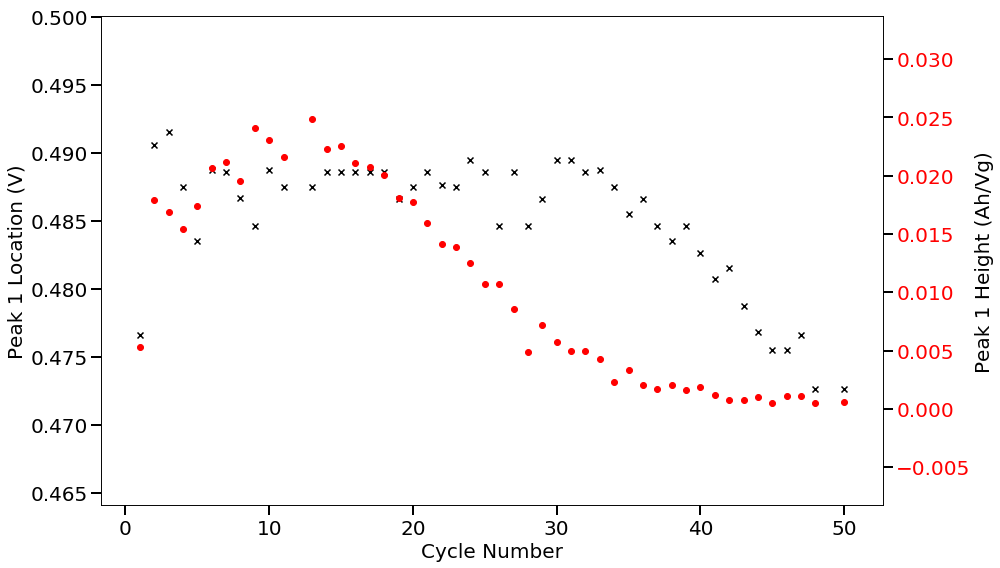

In [41]:
# PLOT JZO FILES
#mydf = dbw.dbfs.get_file_from_database('JZO_170907_1_redoModParams-descriptors', 'dqdvDataBase_92118_1.db')
mydf = dbw.dbfs.get_file_from_database('JZO_170907_1ModParams-descriptors', 'New112918.db')
fig, ax1 = plt.subplots(figsize = (14,8), facecolor = 'w', edgecolor = 'k')

ax1.set_ylabel('Peak 1 Location (V)', fontsize =20)
ax1.set_xlabel('Cycle Number', fontsize = 20)
ax1.scatter(mydf['c_cycle_number'],mydf['sortedloc-c-6'],color = 'black', marker = 'x')

ax1.tick_params(size = 10, width = 2, labelsize = 20)

ax2 = ax1.twinx()
ax2.set_ylabel('Peak 1 Height (Ah/Vg)', fontsize = 20)
ax2.scatter(mydf['c_cycle_number'],mydf['sortedheight-c-6']/0.581, color = 'red')
#ax2.set_ylim ([-0.001, 0.001])
ax2.tick_params(size = 10, width = 2, labelcolor = 'red', labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(fname = 'PlottedJZOAreaandLoc.png', bbox_inches='tight', dpi = 600)


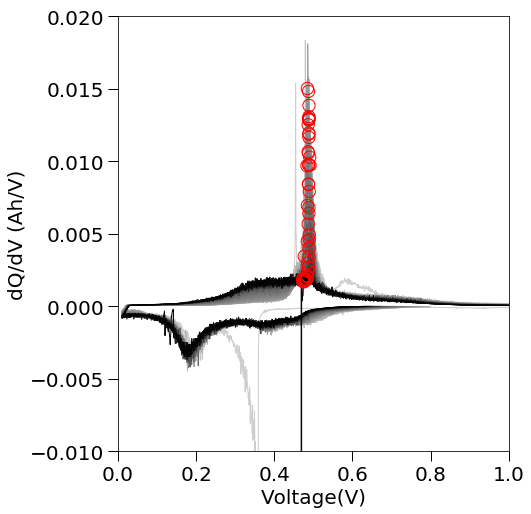

In [45]:
mydf = dbw.dbfs.get_file_from_database('JZO_170907_1CleanSet', 'New112918.db')
des_df = dbw.dbfs.get_file_from_database('JZO_170907_1ModParams-descriptors', 'New112918.db')
fig1 = plt.figure(figsize = (7,8), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.3, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    #if name == 1 or name == 2 or name == 10 or name == 20 or name == 30 or name ==40 or name == 50:
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from 
    plt.plot(group['Voltage(V)'], group['dQ/dV'], c = colors[name-1], linewidth = 1, label = 'Cycle' + str(name)) 
#         plt.plot(group['Voltage(V)'], group['dQ/dV'], c=colors[name-1], linewidth = 2, label = 'Cycle' + str(name))
    # label =str(name)
#this is to make the legend title larger
#plt.scatter(des_df['c_center_peak_3'],des_df['c_height_peak_3'], facecolors = 'none', edgecolor = 'magenta', zorder = 5, s = 150, marker = 's', alpha = 1, label= 'charge peak 1')
#plt.scatter(des_df['sortedloc-c-7'],des_df['sortedheight-c-7'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 2')
plt.scatter(des_df['sortedloc-c-6'],des_df['sortedactheight-c-6'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = 'o', alpha = 1, label = 'charge peak 3')
#for the discharge peak height there has to be a negative sign since the descriptors gathered are an absolute value
#plt.scatter(des_df['peakLocation(V)-d0'],-des_df['peakHeight(dQdV)-d0'], facecolors = 'none', edgecolor = 'blue',zorder = 5, s = 150, alpha = 1, label = 'discharge peak 1')
#plt.scatter(des_df['peakLocation(V)-d1'],-des_df['peakHeight(dQdV)-d1'], color = 'orange', zorder = 5, s = 150, alpha = 1, marker = 'x', label = 'discharge peak 2')
#plt.scatter(des_df['peakLocation(V)-c2'],-des_df['peakHeight(dQdV)-c2'], facecolors = 'none', edgecolor = 'lime', zorder = 5, s = 150, alpha = 1, marker = 'v', label = 'discharge peak 3')

# specifying zorder allows the dots to be on top
#plt.legend()
#leg = plt.legend(loc = 'upper right', fontsize = 14)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (Ah/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.xlim(0, 1)
plt.ylim(-0.01, 0.02)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 1)
plt.savefig(fname = 'JZOChargePeak6Desc.png', bbox_inches='tight', dpi = 600)
#plt.savefig(fname = 'exampledqdvforslide_rawdatapic.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 


In [3]:
# plot example cycle with model overlaid 
mydf = dbw.dbfs.get_file_from_database('CS2_33_1_24_11-CleanSet', 'Classification.db')
mod_df = dbw.dbfs.get_file_from_database('CS2_33_1_24_1-ModPoints', 'Classification.db')
fig1 = plt.figure(figsize = (7,8), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.3, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    if name == 50:
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from 
        plt.plot(group['Voltage(V)'], group['dQ/dV'], c = 'black', linewidth = 2, label = 'Cycle ' + str(name)) 

for name, group in mod_df.groupby(['Cycle_Index']): 
    if name == 50:
        plt.plot(group['Voltage(V)'], group['Model'], c = 'red', linewidth = 2, label = 'Model', linestyle = '--')
plt.legend()
leg = plt.legend(loc = 'upper right', fontsize = 14)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (Ah/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.xlim(0, 1)
plt.ylim(-0.01, 0.02)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 1)
#plt.savefig(fname = 'CS2_1_24ExampleModelOverlay.png', bbox_inches='tight', dpi = 600)
#plt.savefig(fname = 'exampledqdvforslide_rawdatapic.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 


That file does not exist in the database
That file does not exist in the database


TypeError: 'NoneType' object is not subscriptable

# Plot Graphite Example

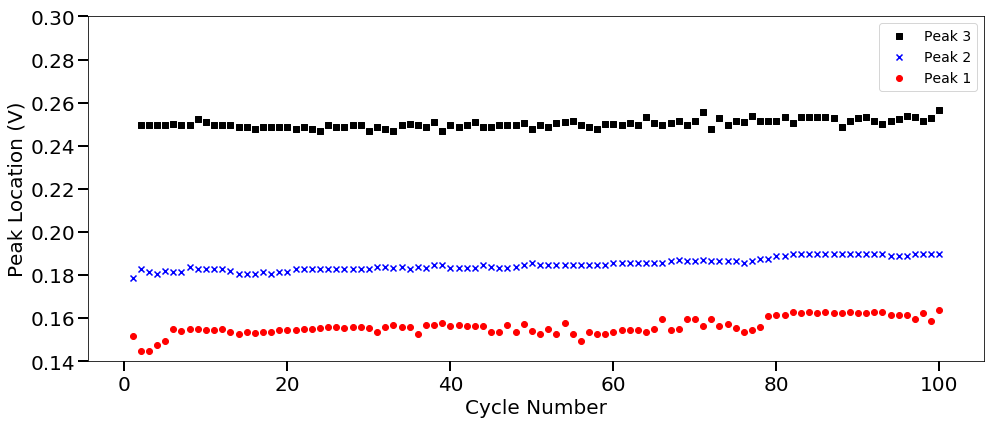

In [73]:

mydf = dbw.dbfs.get_file_from_database('CO_180813_graphiteModParams-descriptors', 'New112918.db')
fig, ax1 = plt.subplots(figsize = (14,6), facecolor = 'w', edgecolor = 'k')

ax1.set_ylabel('Peak Location (V)', fontsize =20)
ax1.set_xlabel('Cycle Number', fontsize = 20)
ax1.scatter(mydf['c_cycle_number'],mydf['sortedloc-c-6'],color = 'black', marker = 's', label = 'Peak 3')
ax1.scatter(mydf['c_cycle_number'],mydf['sortedloc-c-3'],color = 'blue', marker = 'x', label = 'Peak 2')
ax1.scatter(mydf['c_cycle_number'],mydf['sortedloc-c-2'],color = 'red', marker = 'o', label = 'Peak 1')


ax1.set_ylim([0.14, 0.30])

ax1.tick_params(size = 10, width = 2, labelsize = 20)

plt.legend()
leg = plt.legend(loc = 'upper right', fontsize = 14)

# ax2 = ax1.twinx()
# ax2.set_ylabel('Peak 1 Height (Ah/V)', fontsize = 20)
# ax2.scatter(mydf['c_cycle_number'],mydf['sortedarea-c-6'], color = 'black')
# ax2.scatter(mydf['c_cycle_number'],mydf['sortedarea-c-2'], color = 'green')
# ax2.scatter(mydf['c_cycle_number'],mydf['sortedarea-c-3'], color = 'purple')
# ax2.set_ylim ([0, 0.0006])
# ax2.tick_params(size = 10, width = 2, labelcolor = 'red', labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(fname = 'PlottedGraphiteLocations.png', bbox_inches='tight', dpi = 600)


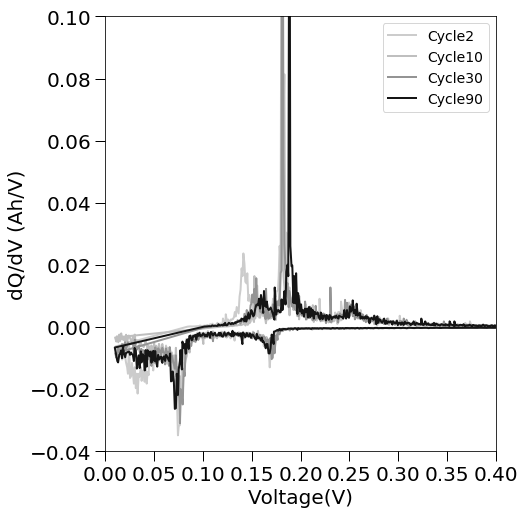

In [52]:
mydf = dbw.dbfs.get_file_from_database('CO_180813_graphiteCleanSet', 'New112918.db')
des_df = dbw.dbfs.get_file_from_database('CO_180813_graphiteModParams-descriptors', 'New112918.db')
fig1 = plt.figure(figsize = (7,8), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.3, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    if name == 2 or name == 10 or name == 30 or name == 90:
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from 
        plt.plot(group['Voltage(V)'], group['dQ/dV'], c = colors[name-1], linewidth = 2, label = 'Cycle' + str(name)) 
#         plt.plot(group['Voltage(V)'], group['dQ/dV'], c=colors[name-1], linewidth = 2, label = 'Cycle' + str(name))
    # label =str(name)
#this is to make the legend title larger
#plt.scatter(des_df['c_center_peak_3'],des_df['c_height_peak_3'], facecolors = 'none', edgecolor = 'magenta', zorder = 5, s = 150, marker = 's', alpha = 1, label= 'charge peak 1')
#plt.scatter(des_df['sortedloc-c-7'],des_df['sortedheight-c-7'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 2')
#plt.scatter(des_df['sortedloc-c-6'],des_df['sortedactheight-c-6'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = 'o', alpha = 1, label = 'charge peak 3')
plt.legend()
leg = plt.legend(loc = 'upper right', fontsize = 14)

plt.ylabel('dQ/dV (Ah/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.xlim(0, 0.4)
plt.ylim(-0.04, 0.1)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 1)
plt.savefig(fname = 'GraphiteCycles.png', bbox_inches='tight', dpi = 600)
#plt.savefig(fname = 'exampledqdvforslide_rawdatapic.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 


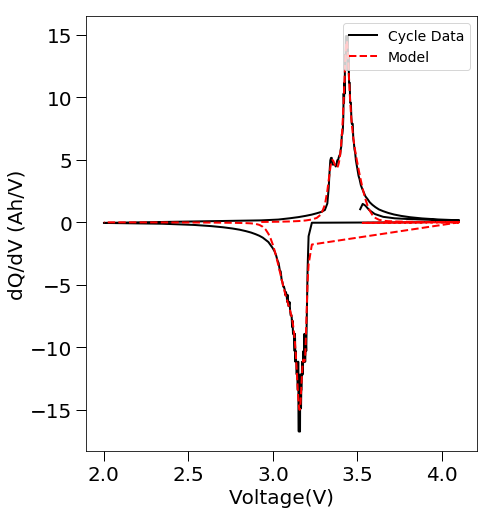

In [39]:
# plot example model fit : 
# plot example cycle with model overlaid 
mydf = dbw.dbfs.get_file_from_database('K2_016\\7_11_13_1CRaw', 'classification_kdata.db')
mod_df = dbw.dbfs.get_file_from_database('K2_016\\7_11_13_1C-ModPoints', 'classification_kdata.db')
fig1 = plt.figure(figsize = (7,8), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.3, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    if name ==1:
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from 
        plt.plot(group['Voltage(V)'], group['dQ/dV'], c = 'black', linewidth = 2, label = 'Cycle Data') 

for name, group in mod_df.groupby(['Cycle_Index']): 
    if name == 1:
        plt.plot(group['Voltage(V)'], group['Model'], c = 'red', linewidth = 2, label = 'Model', linestyle = '--')
plt.legend()
leg = plt.legend(loc = 'upper right', fontsize = 14)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (Ah/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
#plt.xlim(0, 0.4)
#plt.ylim(-2,2)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 1)
#plt.savefig(fname = 'BadCycle_withModelk.png', bbox_inches='tight', dpi = 600)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 

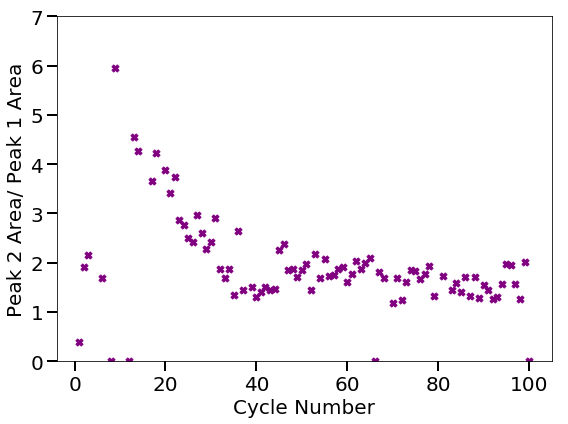

In [116]:
# plot the peak areas
# plot the peak area ratios
mydf = dbw.dbfs.get_file_from_database('CO_180813_graphiteModParams-descriptors', 'New112918.db')
fig, ax1 = plt.subplots(figsize = (8,6), facecolor = 'w', edgecolor = 'k')

ax1.set_ylabel('Peak 2 Area/ Peak 1 Area', fontsize =20) 
ax1.set_xlabel('Cycle Number', fontsize = 20)
#ax1.scatter(mydf['c_cycle_number'],mydf['sortedarea-c-6'],color = 'black', marker = 's', label = 'Peak 3')
ax1.scatter(mydf['c_cycle_number'],mydf['sortedarea-c-3']/mydf['sortedarea-c-2'],color = 'purple', s = 50,marker = 'X', label = 'Peak 2')
#ax1.scatter(mydf['c_cycle_number'],mydf['sortedarea-c-2'],color = 'red', marker = 'o', label = 'Peak 1')
ax1.set_ylim([0, 7])

ax1.tick_params(size = 10, width = 2, labelsize = 20)

# plt.legend()
# leg = plt.legend(loc = 'upper right', fontsize = 14)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(fname = 'PlottedGraphiteAreaRatios1.png', bbox_inches='tight', dpi = 600)


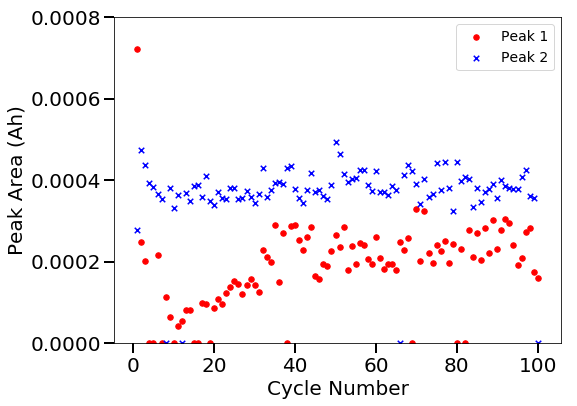

In [119]:
mydf = dbw.dbfs.get_file_from_database('CO_180813_graphiteModParams-descriptors', 'New112918.db')
fig, ax1 = plt.subplots(figsize = (8,6), facecolor = 'w', edgecolor = 'k')

ax1.set_ylabel('Peak Area (Ah)', fontsize =20)
ax1.set_xlabel('Cycle Number', fontsize = 20)

ax1.scatter(mydf['c_cycle_number'],mydf['sortedarea-c-2'], color = 'red', s = 30, label = 'Peak 1')
ax1.scatter(mydf['c_cycle_number'],mydf['sortedarea-c-3'], color = 'blue', s = 30, marker = 'x', label = 'Peak 2')
ax1.set_ylim ([0, 0.0008])
ax1.set_yticks([0, 0.0002, 0.0004, 0.0006, 0.0008])
ax1.tick_params(size = 10, width = 2, labelsize = 20, )


plt.legend()
leg = plt.legend(loc = 'upper right', fontsize = 14)
#plt.savefig(fname = 'PlottedGraphiteAreas2.png', bbox_inches='tight', dpi = 600)

# Show additional Model Fits:

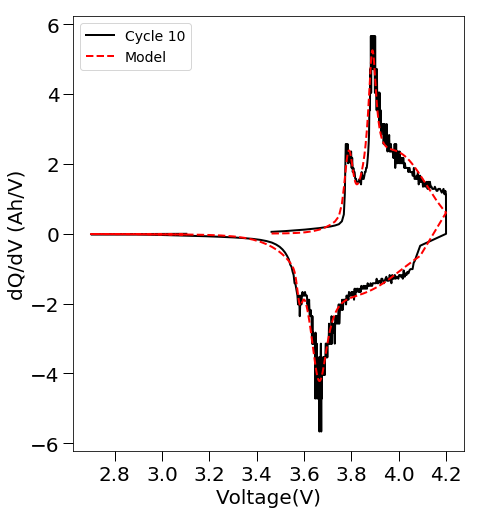

In [142]:
# plot example model fit : 
# plot example cycle with model overlaid 
mydf = dbw.dbfs.get_file_from_database('CS2_33\CS2_33_9_17_10CleanSet', 'classification_cdata.db')
mod_df = dbw.dbfs.get_file_from_database('CS2_33\CS2_33_9_17_10-ModPoints', 'classification_cdata.db')
fig1 = plt.figure(figsize = (7,8), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.3, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    if name == 10:
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from 
        plt.plot(group['Voltage(V)'], group['dQ/dV'], c = 'black', linewidth = 2, label = 'Cycle ' + str(name)) 

for name, group in mod_df.groupby(['Cycle_Index']): 
    if name == 10:
        plt.plot(group['Voltage(V)'], group['Model'], c = 'red', linewidth = 2, label = 'Model', linestyle = '--')
plt.legend()
leg = plt.legend(loc = 'upper left', fontsize = 14)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (Ah/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
#plt.xlim(2.5, 4.5)
#plt.ylim(-0.04, 0.1)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 1)
plt.savefig(fname = 'LiCoO2ModelExample6.png', bbox_inches='tight', dpi = 600)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 

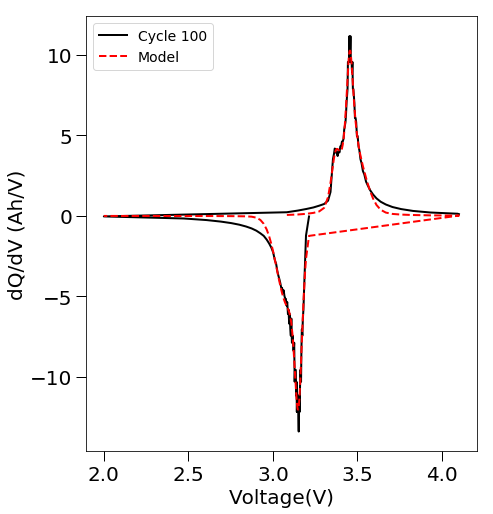

In [12]:
mydf = dbw.dbfs.get_file_from_database('K2_016\\12_4_13_1CCleanSet', 'classification_kdata.db')
mod_df = dbw.dbfs.get_file_from_database('K2_016\\12_4_13_1C-ModPoints', 'classification_kdata.db')


fig1 = plt.figure(figsize = (7,8), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.3, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    if name == 100:
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from 
        plt.plot(group['Voltage(V)'], group['dQ/dV'], c = 'black', linewidth = 2, label = 'Cycle ' + str(name)) 

for name, group in mod_df.groupby(['Cycle_Index']): 
    if name == 100:
        plt.plot(group['Voltage(V)'], group['Model'], c = 'red', linewidth = 2, label = 'Model', linestyle = '--')
plt.legend()
leg = plt.legend(loc = 'upper left', fontsize = 14)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (Ah/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
#plt.xlim(2.5, 4.5)
#plt.ylim(-0.04, 0.1)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 1)
plt.savefig(fname = 'LiFePO4ModelExample12_4_13_100.png', bbox_inches='tight', dpi = 600)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 

# Other

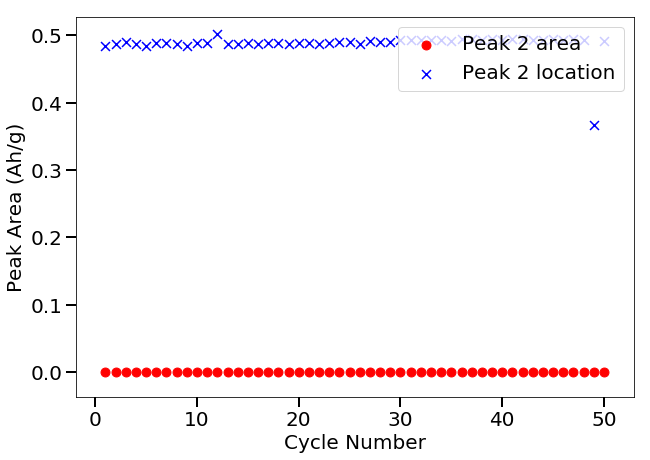

In [97]:
myfig = plt.figure(figsize=(10, 7))
plt.scatter(datadf['c_cycle_number'], (datadf['sortedarea-c-7']/0.581), c = 'red', s = 80, label = 'Peak 2 area')
plt.scatter(datadf['c_cycle_number'], datadf['sortedloc-c-7'], c = 'blue', marker = 'x', s = 80, label = 'Peak 2 location')
#plt.scatter(datadf['c_cycle_number'], (datadf['sortedarea-c-2']/0.291), c = 'blue', marker = '^', s = 80, label = 'Peak 1')
#datadf['ratio'] = datadf['sortedarea-c-3']/datadf['sortedarea-c-2']
#x = datadf['c_cycle_number']
#y = datadf['ratio']
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
#plt.ylim(0.48, 0.5)
#plt.xlim(0,0.4)
plt.xlabel('Cycle Number', fontsize = 20)
plt.ylabel('Peak Area (Ah/g)', fontsize = 20)
leg = plt.legend(loc = 'upper right', fontsize = 20)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
plt.setp(leg.get_title(),fontsize=16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2)
plt.savefig(fname = 'PlottedAreas_JZO.png', bbox_inches='tight', dpi = 600)

In [77]:
# threepeakslist = []
# for i in range(len(datadf)):
#     if not np.isnan(datadf.loc[i, ('c_center_peak_3')]):
#         #print(datadf.loc[i, ('c_center_peak_3')]
#         #print(datadf.loc[i, ('c_cycle_number')])
#         threepeakslist.append(datadf.loc[i, ('c_cycle_number')])
#         #these are the cycles using 3 peaks - likely broad ones throwin off the peak fitting for the other two 
# for item in threepeakslist:
#     #print(item)
#     datadf = datadf[datadf['c_cycle_number'] != item]
# datadf = datadf.reset_index(drop = True)
datadf = datadf[datadf['sortedarea-c-2']/0.291 > 0.00001] #eliminate the data points which above appear to be at 0
#datadf2 = datadf
datadf2 = datadf[datadf['c_cycle_number'] > 24]

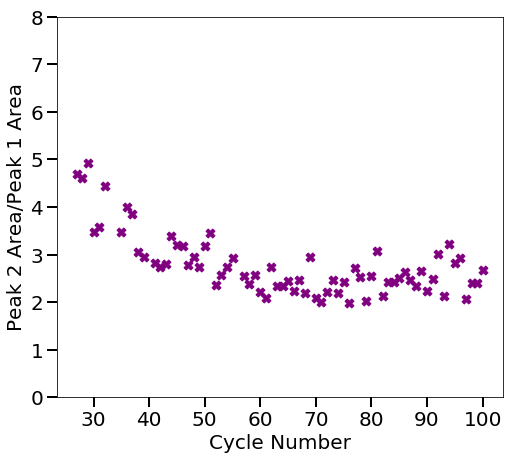

In [104]:
myfig = plt.figure(figsize=(8,7))
plt.scatter(datadf2['c_cycle_number'], datadf2['sortedarea-c-3']/datadf2['sortedarea-c-2'], c = 'purple', marker = 'X', s = 80, label = 'Peak Ratios')
datadf2['ratio'] = datadf2['sortedarea-c-3']/datadf2['sortedarea-c-2']
x = datadf2['c_cycle_number']
y = datadf2['ratio']
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.ylim(0, 8)
#plt.xlim(0,0.4)
plt.xlabel('Cycle Number', fontsize = 20)
plt.ylabel('Peak 2 Area/Peak 1 Area', fontsize = 20)
#leg = plt.legend(loc = 'upper right', fontsize = 20)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#plt.setp(leg.get_title(),fontsize=16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2)
plt.savefig(fname = 'PlottedAreaRatio_JZO.png', bbox_inches='tight', dpi = 600)
# this is after eliminating ones where there are 3 peaks or the polynomial baseline is contributing too much to peak 1 
# leading it to have an artificially small area (probably)

# Old stuff

In [107]:
mydf

,level_0,index,Abs_Current(A),Cap(Ah),Charge_dQ,Const_Weight,Current(A),Cycle P,Cycle_Index,DPT Time,...,VAR7,VAR8,VAR9,Voltage(V),dQ/dV,dV,datatype,roundedV,Battery_Label,Smoothed_dQ/dV
0,0,9,0.000032,1.800000e-07,NaN,0.581,-0.000032,0,1,9/7/2017 11:00:45 PM,...,0.0,0.0,0.0,1.8248,-0.000001,-0.0842,MACCOR,1.825,JZO_170907_1_redo,-0.000001
1,1,10,0.000032,2.700000e-07,NaN,0.581,-0.000032,0,1,9/7/2017 11:00:55 PM,...,0.0,0.0,0.0,1.7676,-0.000002,-0.0572,MACCOR,1.768,JZO_170907_1_redo,-0.000002
2,2,11,0.000032,3.600000e-07,NaN,0.581,-0.000032,0,1,9/7/2017 11:01:05 PM,...,0.0,0.0,0.0,1.7219,-0.000002,-0.0457,MACCOR,1.722,JZO_170907_1_redo,-0.000002
3,3,12,0.000032,4.500000e-07,NaN,0.581,-0.000032,0,1,9/7/2017 11:01:15 PM,...,0.0,0.0,0.0,1.6835,-0.000002,-0.0384,MACCOR,1.684,JZO_170907_1_redo,-0.000002
4,4,13,0.000032,5.400000e-07,NaN,0.581,-0.000032,0,1,9/7/2017 11:01:25 PM,...,0.0,0.0,0.0,1.6505,-0.000003,-0.0330,MACCOR,1.650,JZO_170907_1_redo,-0.000003
5,5,14,0.000032,6.200000e-07,NaN,0.581,-0.000032,0,1,9/7/2017 11:01:35 PM,...,0.0,0.0,0.0,1.6218,-0.000003,-0.0287,MACCOR,1.622,JZO_170907_1_redo,-0.000003
6,6,15,0.000032,7.100000e-07,NaN,0.581,-0.000032,0,1,9/7/2017 11:01:45 PM,...,0.0,0.0,0.0,1.5968,-0.000004,-0.0250,MACCOR,1.597,JZO_170907_1_redo,-0.000004
7,7,16,0.000032,8.000000e-07,NaN,0.581,-0.000032,0,1,9/7/2017 11:01:55 PM,...,0.0,0.0,0.0,1.5753,-0.000004,-0.0215,MACCOR,1.575,JZO_170907_1_redo,-0.000004
8,8,17,0.000032,8.900000e-07,NaN,0.581,-0.000032,0,1,9/7/2017 11:02:05 PM,...,0.0,0.0,0.0,1.5562,-0.000005,-0.0191,MACCOR,1.556,JZO_170907_1_redo,-0.000005
9,9,18,0.000032,9.800000e-07,NaN,0.581,-0.000032,0,1,9/7/2017 11:02:15 PM,...,0.0,0.0,0.0,1.5388,-0.000005,-0.0174,MACCOR,1.539,JZO_170907_1_redo,-0.000005


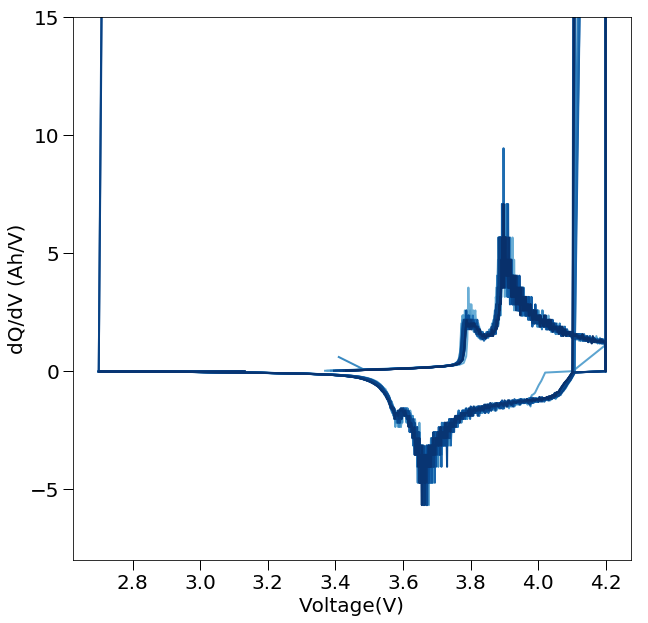

In [35]:
'data/CS2_33/CS2_33_10_04_10.xlsx'
mydf = dbw.dbfs.get_file_from_database('CS2_33_10_04_10Raw', 'dqdvDataBase_92118_1.db')
#des_df = dbw.dbfs.get_file_from_database('CO_180813_graphite_5p291mg_CapacityRetention007fulldataModParams-descriptors', 'dqdvDataBase_92118_1.db')
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Blues(np.linspace(0.5, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from 
    plt.plot(group['Voltage(V)'], group['dQ/dV'], c = colors[name-1], linewidth = 2, label = 'Cycle' + str(name)) 
#         plt.plot(group['Voltage(V)'], group['dQ/dV'], c=colors[name-1], linewidth = 2, label = 'Cycle' + str(name))
    # label =str(name)
#this is to make the legend title larger
#plt.scatter(des_df['c_center_peak_3'],des_df['c_height_peak_3'], facecolors = 'none', edgecolor = 'magenta', zorder = 5, s = 150, marker = 's', alpha = 1, label= 'charge peak 1')
#plt.scatter(des_df['sortedloc-c-7'],des_df['sortedheight-c-7'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 2')
#plt.scatter(des_df['sortedloc-c-6'],des_df['sortedheight-c-6'],facecolors = 'none', edgecolor = 'purple', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 3')
#for the discharge peak height there has to be a negative sign since the descriptors gathered are an absolute value
#plt.scatter(des_df['peakLocation(V)-d0'],-des_df['peakHeight(dQdV)-d0'], facecolors = 'none', edgecolor = 'blue',zorder = 5, s = 150, alpha = 1, label = 'discharge peak 1')
#plt.scatter(des_df['peakLocation(V)-d1'],-des_df['peakHeight(dQdV)-d1'], color = 'orange', zorder = 5, s = 150, alpha = 1, marker = 'x', label = 'discharge peak 2')
#plt.scatter(des_df['peakLocation(V)-c2'],-des_df['peakHeight(dQdV)-c2'], facecolors = 'none', edgecolor = 'lime', zorder = 5, s = 150, alpha = 1, marker = 'v', label = 'discharge peak 3')

# specifying zorder allows the dots to be on top
#plt.legend()
#leg = plt.legend(loc = 'upper right', fontsize = 14)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (Ah/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
#plt.xlim(0, 1)
plt.ylim(-8, 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 1)
plt.savefig(fname = 'exampledqdvforslide_rawdatapic.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 

#cycle 1 and 2 will be different 

In [2]:
mydf = dbw.dbfs.get_file_from_database('CO_180813_graphite_5p291mg_CapacityRetention007fulldataCleanSet', 'dqdvDataBase_92118_1.db')
#'data/example_files/Raw_Data_Examples/CO_180813_graphite_5p291mg_CapacityRetention007fulldata.TXT'

In [3]:
for cyc in mydf['Cycle_Index'].unique():
    print(len(mydf[mydf['Cycle_Index']==cyc]))
    print(cyc)
#lenmax = max(length_dict.values())
length_list = [len(mydf[mydf['Cycle_Index']==cyc]) for cyc in mydf['Cycle_Index'].unique() if cyc != 1]
max(length_list)

2146
1
893
2
885
3
878
4
872
5
868
6
862
7
860
8
853
9
847
10
849
11
849
12
854
13
857
14
854
15
863
16
858
17
859
18
858
19
864
20
859
21
864
22
865
23
858
24
864
25
861
26
866
27
861
28
864
29
867
30
865
31
869
32
865
33
865
34
867
35
864
36
872
37
869
38
868
39
866
40
868
41
863
42
868
43
864
44
863
45
870
46
870
47
870
48
867
49
869
50
873
51
871
52
868
53
868
54
869
55
871
56
867
57
869
58
869
59
872
60
866
61
871
62
864
63
867
64
866
65
870
66
860
67
869
68
870
69
867
70
866
71
868
72
865
73
865
74
870
75
871
76
868
77
868
78
865
79
869
80
863
81
865
82
866
83
853
84
860
85
860
86
860
87
861
88
865
89
862
90
864
91
856
92
862
93
864
94
868
95
864
96
856
97
868
98
858
99
858
100


893

In [9]:
from descriptors import fitters

[0.1595 0.1867]


C:\Users\Nicole\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


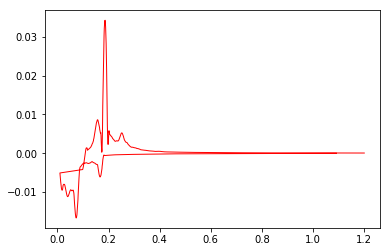

In [18]:
for name, group in mydf.groupby(['Cycle_Index']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    if name == 70:
        group5df = group
        group['smoothed_newdqdv'] = scipy.signal.savgol_filter(group['Smoothed_dQ/dV'], 25, 3)
        plt.plot(group['Voltage(V)'], group['smoothed_newdqdv'], c='red', linewidth = 1, label = '_nolegend_')
        clean_charge, clean_discharge = dbw.ccf.sep_char_dis(group, 'MACCOR')
        windowlength = 25
        polyorder = 3
        lenmax = 895
        datatype = 'MACCOR'
        cd = 'c'
        df_run = clean_charge
# speed this up by moving the initial peak finder out of this, and just have those two things passed to it 
        (cycle_ind_col, data_point_col, volt_col, curr_col, dis_cap_col, char_cap_col, charge_or_discharge) = ccf.col_variables(datatype)
        V_series = df_run[volt_col]
        #dQdV_series = df_run['dQ/dV']
        # this makes the peak finding smoothing independent of any smoothing that has already occured. 
        dQdV_series = df_run['Smoothed_dQ/dV']
        #assert len(dQdV_series) > 10

        sigx, sigy = fitters.cd_dataframe(V_series, dQdV_series, cd)
        ################################################
        wl = lenmax/20
        wlint = int(round(wl))
        if wlint%2 == 0:
            windowlength_new = wlint + 1
        else: 
            windowlength_new = wlint
        ###############################################
        #the below is to make sure the window length ends up an odd number - even though we are basing it on the length of the df
        if len(sigy) > windowlength_new:
            #has to be larger than 69 so that windowlength > 3 - necessary for sav golay function  
            sigy_smooth = scipy.signal.savgol_filter(sigy, windowlength_new, polyorder)
        else:
            sigy_smooth = sigy
        # this used to be sigy_smooth in the .indexes function below -= changed it to just sigy for graphite
        # change was made on 9.12.18  . also changed min_dist=lenmax/50 to min_dist= 10
        ###################################################
        i = peakutils.indexes(sigy_smooth, thres=0.3, min_dist=lenmax/50)
        ###################################################
        #i = peakutils.indexes(sigy_smooth, thres=0.7, min_dist=50) # used to be 0.25
        #i = peakutils.indexes(sigy_smooth, thres=.3 /
        #                      max(sigy_smooth), min_dist=9)
        #print(i)

        if i is not None and len(i)>0:
            sigx_volts = sigx[i]
        print(sigx_volts)

In [ ]:
'data/example_files/Raw_Data_Examples/CS2_33_10_04_10.xlsx'

In [143]:
df_cleanset = dbw.dbfs.get_file_from_database('CS2_33_10_04_10-CleanCycle15', 'dqdvDataBase_92118_1.db')
df_clean, discharge = dbw.ccf.sep_char_dis(df_cleanset, 'CALCE')
datatype = 'CALCE'
cyc = 15
v_toappend_c= []
v_toappend_d = []
(cycle_ind_col, data_point_col, volt_col, curr_col, dis_cap_col, char_cap_col, charge_or_discharge) = dbw.ccf.col_variables(datatype)
clean_charge, clean_discharge = dbw.ccf.sep_char_dis(df_clean[df_clean[cycle_ind_col] ==cyc], datatype)
windowlength = 75
polyorder = 3
# speed this up by moving the initial peak finder out of this, and just have those two things passed to it 
i_charge, volts_i_ch = dbw.descriptors.fitters.peak_finder(clean_charge, 'c', windowlength, polyorder, datatype)
#chargeloc_dict.update({cyc: volts_i_ch})
V_series_c = clean_charge[volt_col]
dQdV_series_c = clean_charge['Smoothed_dQ/dV']
par_c, mod_c, indices_c = dbw.descriptors.fitters.model_gen(V_series_c, dQdV_series_c, 'c', i_charge, cyc, v_toappend_c)
model_c = dbw.descriptors.fitters.model_eval(V_series_c, dQdV_series_c, 'c', par_c, mod_c)			
if model_c is not None:
    mod_y_c = mod_c.eval(params = model_c.params, x = V_series_c)
    myseries_c = pd.Series(mod_y_c)
    myseries_c = myseries_c.rename('Model')
    model_c_vals = model_c.values
    new_df_mody_c = pd.concat([myseries_c, V_series_c, dQdV_series_c, clean_charge[cycle_ind_col]], axis = 1)
else:
    mod_y_c = None
    new_df_mody_c = None
    model_c_vals = None
# now the discharge: 
i_discharge, volts_i_dc = dbw.descriptors.fitters.peak_finder(clean_discharge, 'd', windowlength, polyorder, datatype)
V_series_d = clean_discharge[volt_col]
dQdV_series_d = clean_discharge['Smoothed_dQ/dV']
par_d, mod_d, indices_d = dbw.descriptors.fitters.model_gen(V_series_d, dQdV_series_d, 'd', i_discharge, cyc, v_toappend_d)
model_d = dbw.descriptors.fitters.model_eval(V_series_d, dQdV_series_d, 'd', par_d, mod_d)			
if model_d is not None:
    mod_y_d = mod_d.eval(params = model_d.params, x = V_series_d)
    myseries_d = pd.Series(mod_y_d)
    myseries_d = myseries_d.rename('Model')
    new_df_mody_d = pd.concat([-myseries_d, V_series_d, dQdV_series_d, clean_discharge[cycle_ind_col]], axis = 1)
    model_d_vals = model_d.values
else:
    mod_y_d = None
    new_df_mody_d = None
    model_d_vals = None
# save the model parameters in the database with the data

new_df_mody = pd.concat([new_df_mody_c, new_df_mody_d], axis = 0)

# combine the charge and discharge


#return new_df_mody, model_c_vals, model_d_vals

C:\Users\Nicole\Miniconda3\lib\site-packages\lmfit\models.py:284: RankWarning: Polyfit may be poorly conditioned
  out = np.polyfit(x, data, self.poly_degree)


In [145]:
model_c_vals

{'a159_amplitude': 7.922225272616323e-05,
 'a159_center': 4.059780120849609,
 'a159_fraction': 0.543297200967142,
 'a159_fwhm': 0.004993611401553633,
 'a159_height': 0.012293848118299672,
 'a159_sigma': 0.0024968057007768163,
 'a73_amplitude': 0.11632089500824638,
 'a73_center': 3.8998944759368896,
 'a73_fraction': 0.2201485200039534,
 'a73_fwhm': 0.03874821679079643,
 'a73_height': 2.6200347077157247,
 'a73_sigma': 0.019374108395398215,
 'c0': 25809.79820647554,
 'c1': -26283.966709060274,
 'c2': 10005.560499566183,
 'c3': -1687.335429025948,
 'c4': 106.36235549225187}

group3_10242017_graphite_0p0212CleanSet


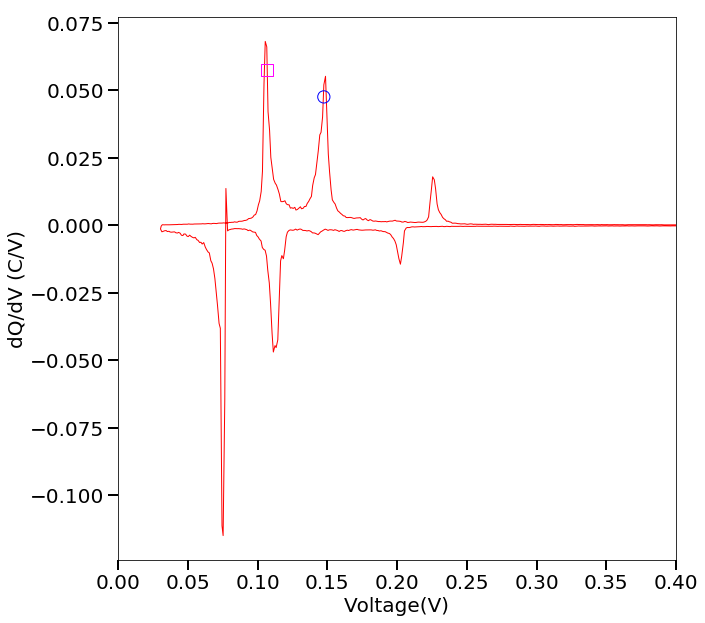

In [42]:
mydf = dbw.dbfs.get_file_from_database(cleansetname, database)
des_df = dbw.dbfs.get_file_from_database(descriptname, database)
print(cleansetname)
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Blues(np.linspace(0.5, 1, int(max(mydf['Cycle C']))))
for name, group in mydf.groupby(['Cycle C']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    if name == 5:
        group5df = group
        group['smoothed_newdqdv'] = scipy.signal.savgol_filter(group['dQ/dV'], 5, 3)
        #tune those sav golay parameters instead of using smoothed column - does the same thing 
        plt.plot(group['Voltage(V)'], group['smoothed_newdqdv'], c='red', linewidth = 1, label = '_nolegend_')
        #plt.plot(group['Voltage(V)'], group['smoothed_newdqdv'], c=colors[name-1], linewidth = 1, label = '_nolegend_')
                 #label =str(name))
#this is to make the legend title larger
plt.scatter(peakloc[0],peakheight[0], facecolors = 'none', edgecolor = 'magenta', zorder = 5, s = 150, marker = 's', alpha = 1, label= 'charge peak 1')
#plt.scatter(des_df['sortedloc-c-2'],des_df['sortedheight-c-2'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 2')
#plt.scatter(des_df['sortedloc-c-3'],des_df['sortedheight-c-3'],facecolors = 'none', edgecolor = 'purple', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 3')
#for the discharge peak height there has to be a negative sign since the descriptors gathered are an absolute value
plt.scatter(peakloc[1],peakheight[1], facecolors = 'none', edgecolor = 'blue',zorder = 5, s = 150, alpha = 1, label = 'discharge peak 1')
#plt.scatter(des_df['sortedloc-d-2'],-des_df['sortedheight-d-2'], color = 'orange', zorder = 5, s = 150, alpha = 1, marker = 'x', label = 'discharge peak 2')
#plt.scatter(des_df['sortedloc-d-3'],-des_df['sortedheight-d-3'], facecolors = 'none', edgecolor = 'lime', zorder = 5, s = 150, alpha = 1, marker = 'v', label = 'discharge peak 3')
#plt.scatter(des_df['sortedloc-d-4'],-des_df['sortedheight-d-4'], facecolors = 'none', edgecolor = 'purple', zorder = 5, s = 150, alpha = 1, marker = 'v', label = 'discharge peak 4')

# specifying zorder allows the dots to be on top
#leg = plt.legend(loc = 'upper right', fontsize = 14)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.xlim(0, 0.4)
#plt.ylim(-0.01, 0.03)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2)
#plt.savefig(fname = 'data/ResultPics/pic2_Epp82818_smootheddata_set6.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 
#cycle 1 and 2 will be different 

# Plot the C/V data with a colormap:

## MACCOR Format: 

In [7]:
mydf = dbw.dbfs.get_file_from_database(cleansetname, database)

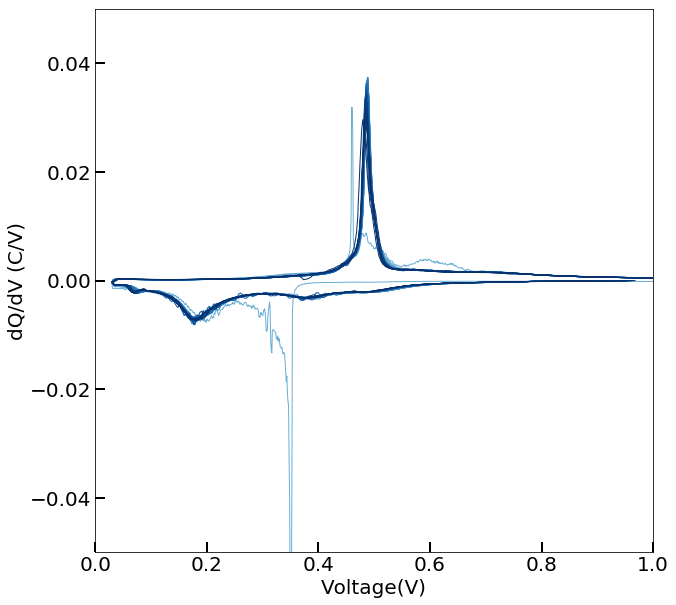

In [135]:
mydf['newcolumnormalized'] = mydf['dQ/dV']/mydf['Const_Weight']
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Blues(np.linspace(0.5, 1, int(max(mydf['Cycle C']))))
# https://matplotlib.org/examples/color/colormaps_reference.html
for name, group in mydf.groupby(['Cycle C']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    if name == 1:
        group['smoothed_normalized'] = scipy.signal.savgol_filter(group['newcolumnormalized'], 3, 1)
        plt.plot(group['Voltage(V)'], group['smoothed_normalized'], c=colors[name-1], linewidth = 1, label =str(name))
    else:
        group['smoothed_normalized'] = scipy.signal.savgol_filter(group['newcolumnormalized'], 9, 1)
        plt.plot(group['Voltage(V)'], group['smoothed_normalized'], c=colors[name-1], linewidth = 1, label =str(name))
    #or name == 50:
    #plt.plot(group['Voltage(V)'], group['newcolumnormalized'], c=colors[name-1], linewidth = 1, label =str(name))
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#this is to make the legend title larger
#plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.ylim(-0.05, 0.05)
plt.xlim(0,1.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2, direction = 'in')
plt.savefig(fname = 'elenadatatest82818_5smoothed.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 

## CALCE format: 

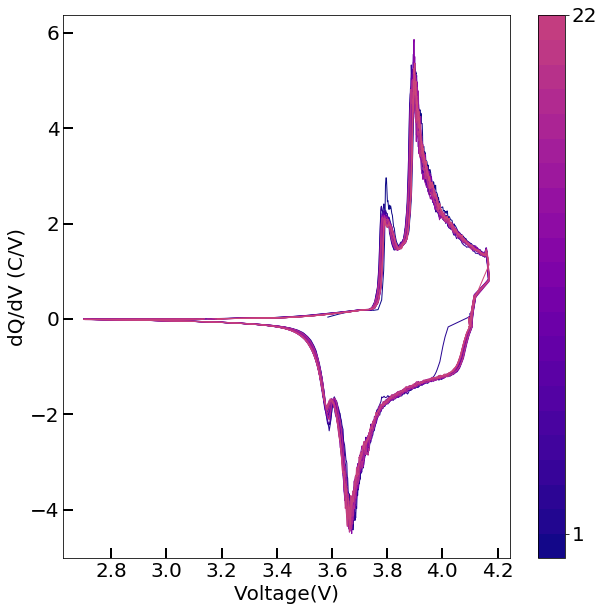

In [5]:
mydf = dbw.dbfs.get_file_from_database('CS2_33_10_04_10CleanSet', database)
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
bottomlim = 0 
toplim = 0.5
colors = matplotlib.cm.plasma(np.linspace(bottomlim, toplim, int(max(mydf['Cycle_Index']))))
#mymap = matplotlib.colors.Colormap('plasma', N = 52)
#mymap = matplotlib.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
Z = [[0,0],[0,0]]
levels = range(int(max(mydf['Cycle_Index'])))
CS3 = plt.contourf(Z, levels, cmap=plt.cm.plasma, vmin = 0, vmax = int(max(mydf['Cycle_Index']))/toplim)
plt.clf()
# https://matplotlib.org/examples/color/colormaps_reference.html
for name, group in mydf.groupby(['Cycle_Index']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    #if name == 3 or name == 7 or name == 50:
        plt.plot(group['Voltage(V)'], group['Smoothed_dQ/dV'], c=colors[name-1], linewidth = 1, label =str(name))
    


#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
#this is to make the legend title larger
#plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
cbar = plt.colorbar(CS3, ticks = [1, 22])
cbar.ax.tick_params(labelsize = 20)
#for label in cbar.ax.yaxis.get_ticklabels()[::2]:
#    print(label)
#    label.set_visible(False)
#cbar.ax.set_yticklabels(['1', str(int(max(mydf['Cycle_Index'])))])
#plt.ylim(-0.05, 0.05)
#plt.xlim(0,1.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2, direction = 'in')
plt.savefig(fname = 'calceexampletest3.png', bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 

# Plotting the descriptors: 

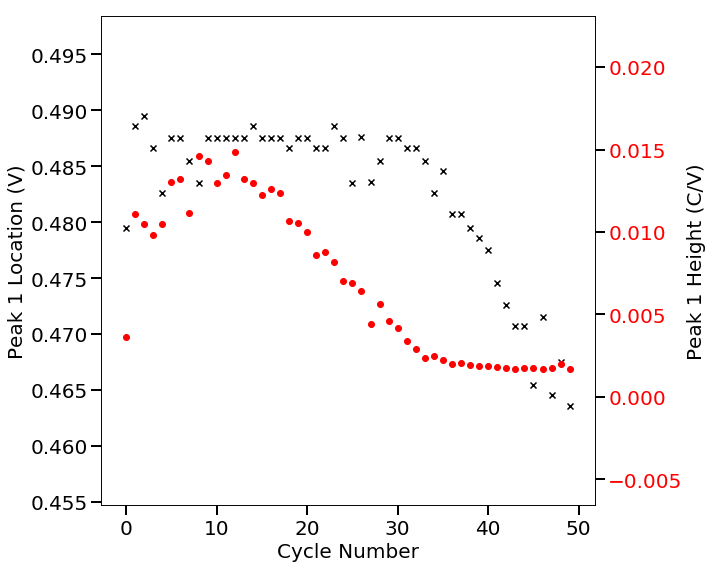

In [5]:
mydf = dbw.dbfs.get_file_from_database('JZO_170907_1_redo-descriptors', database)
fig, ax1 = plt.subplots(figsize = (10,8), facecolor = 'w', edgecolor = 'k')
#fig1 = plt.figure(figsize = (8,8), facecolor = 'w', edgecolor= 'k')
#myplot = plt.scatter(mydf['index'],mydf['sortedloc-c-1'], color = 'red')
#plt.scatter(mydf['index'], mydf['sortedheight-c-2'], color = 'blue')
#plt.plot(mydf['Voltage(V)'], mydf['dQ/dV'], color = 'red')
#plt.ylim(-20, 20)
#plt.ylabel('Peak 1 Height (C/V)', fontsize =20)
ax1.set_ylabel('Peak 1 Location (V)', fontsize =20)
#plt.xlabel('Cycle Number', fontsize = 20)
ax1.set_xlabel('Cycle Number', fontsize = 20)
ax1.scatter(mydf['index'],mydf['sortedloc-c-1'],color = 'black', marker = 'x')
#ax1.xticks(fontsize = 20)
#ax1.yticks(fontsize = 20)
ax1.tick_params(size = 10, width = 2, labelsize = 20)
#ax1.savefig(fname = 'data/ResultPics/PlottedLocations_JZO_2.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)

ax2 = ax1.twinx()
ax2.set_ylabel('Peak 1 Height (C/V)', fontsize = 20)
ax2.scatter(mydf['index'],mydf['sortedheight-c-1'], color = 'red')
ax2.tick_params(size = 10, width = 2, labelcolor = 'red', labelsize = 20)

#fig, ax1 = plt.subplots()

#color = 'tab:red'
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp', color=color)
#ax1.plot(t, data1, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(fname = 'data/ResultPics/PlottedLocations_JZO_heightandloc2.png', bbox_inches='tight', dpi = 500)
#plt.show()

# Plotting Descriptors with C/V Curves

## CALCE Format: 

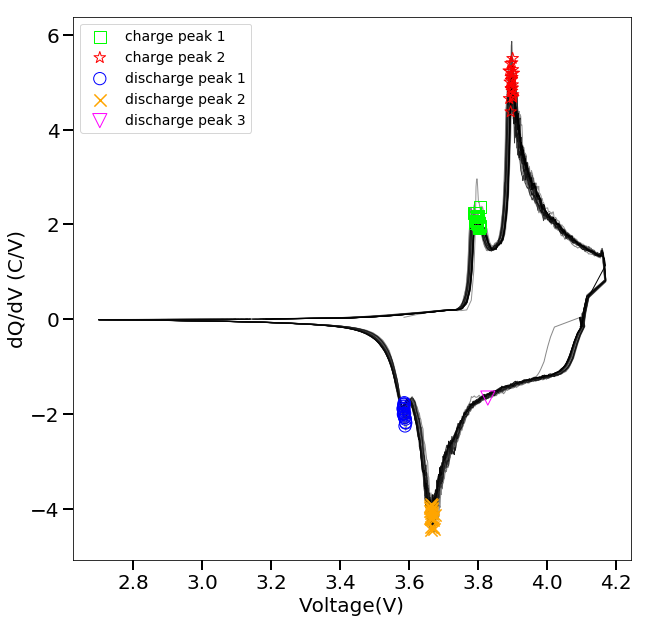

In [54]:
mydf = dbw.dbfs.get_file_from_database('CS2_33_10_04_10CleanSet', database)
des_df = dbw.dbfs.get_file_from_database('CS2_33_10_04_10-descriptors', database)
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.5, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    plt.plot(group['Voltage(V)'], group['Smoothed_dQ/dV'], c=colors[name-1], linewidth = 1, label = '_nolegend_')
             #label =str(name))

#this is to make the legend title larger
plt.scatter(des_df['sortedloc-c-1'],des_df['sortedheight-c-1'], facecolors = 'none', edgecolor = 'lime', zorder = 5, s = 150, marker = 's', alpha = 1, label= 'charge peak 1')
plt.scatter(des_df['sortedloc-c-2'],des_df['sortedheight-c-2'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 2')
#for the discharge peak height there has to be a negative sign since the descriptors gathered are an absolute value
plt.scatter(des_df['sortedloc-d-1'],-des_df['sortedheight-d-1'], facecolors = 'none', edgecolor = 'blue',zorder = 5, s = 150, alpha = 1, label = 'discharge peak 1')
plt.scatter(des_df['sortedloc-d-2'],-des_df['sortedheight-d-2'], color = 'orange', zorder = 5, s = 150, alpha = 1, marker = 'x', label = 'discharge peak 2')
plt.scatter(des_df['sortedloc-d-3'],-des_df['sortedheight-d-3'], facecolors = 'none', edgecolor = 'magenta', zorder = 5, s = 200, alpha = 1, marker = 'v', label = 'discharge peak 3')
# specifying zorder allows the dots to be on top
leg = plt.legend(loc = 'upper left', fontsize = 14)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2)
plt.savefig(fname = 'data/ResultPics/pic82818_sortedpeaks1.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 
#cycle 1 and 2 will be different 

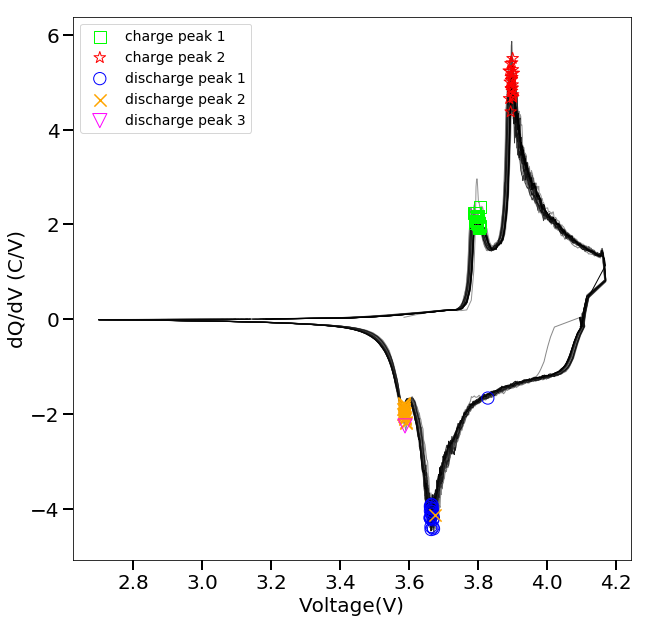

In [59]:
mydf = dbw.dbfs.get_file_from_database('CS2_33_10_04_10CleanSet', database)
des_df = dbw.dbfs.get_file_from_database('CS2_33_10_04_10-descriptors', database)
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.5, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    plt.plot(group['Voltage(V)'], group['Smoothed_dQ/dV'], c=colors[name-1], linewidth = 1, label = '_nolegend_')
             #label =str(name))

#this is to make the legend title larger
plt.scatter(des_df['peakLocation(V)-c0'],des_df['peakHeight(dQdV)-c0'], facecolors = 'none', edgecolor = 'lime', zorder = 5, s = 150, marker = 's', alpha = 1, label= 'charge peak 1')
plt.scatter(des_df['peakLocation(V)-c1'],des_df['peakHeight(dQdV)-c1'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 2')
#for the discharge peak height there has to be a negative sign since the descriptors gathered are an absolute value
plt.scatter(des_df['peakLocation(V)-d0'],-des_df['peakHeight(dQdV)-d0'], facecolors = 'none', edgecolor = 'blue',zorder = 5, s = 150, alpha = 1, label = 'discharge peak 1')
plt.scatter(des_df['peakLocation(V)-d1'],-des_df['peakHeight(dQdV)-d1'], color = 'orange', zorder = 5, s = 150, alpha = 1, marker = 'x', label = 'discharge peak 2')
plt.scatter(des_df['peakLocation(V)-d2'],-des_df['peakHeight(dQdV)-d2'], facecolors = 'none', edgecolor = 'magenta', zorder = 15, s = 200, alpha = 1, marker = 'v', label = 'discharge peak 3')
# specifying zorder allows the dots to be on top
leg = plt.legend(loc = 'upper left', fontsize = 14)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2)
plt.savefig(fname = 'data/ResultPics/pic82818_unsortedpeaks1.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 
#cycle 1 and 2 will be different 

In [6]:
mydf = dbw.dbfs.get_file_from_database('7_8_13_1CCleanSet', database)
des_df = dbw.dbfs.get_file_from_database('7_8_13_1C-descriptors', database)
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.5, 1, int(max(mydf['Cycle_Index']))))
for name, group in mydf.groupby(['Cycle_Index']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    plt.plot(group['Voltage(V)'], group['Smoothed_dQ/dV'], c=colors[name-1], linewidth = 1, label =str(name))

#this is to make the legend title larger
plt.scatter(des_df['sortedloc-c-1'],des_df['sortedheight-c-1'], facecolors = 'none', edgecolor = 'magenta', zorder = 5, s = 150, marker = 's', alpha = 1, label= 'charge peak 1')
plt.scatter(des_df['sortedloc-c-2'],des_df['sortedheight-c-2'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 2')
#for the discharge peak height there has to be a negative sign since the descriptors gathered are an absolute value
plt.scatter(des_df['sortedloc-d-1'],-des_df['sortedheight-d-1'], facecolors = 'none', edgecolor = 'blue',zorder = 5, s = 150, alpha = 1, label = 'discharge peak 1')
plt.scatter(des_df['sortedloc-d-2'],-des_df['sortedheight-d-2'], color = 'orange', zorder = 5, s = 150, alpha = 1, marker = 'x', label = 'discharge peak 2')
#plt.scatter(des_df['sortedloc-d-3'],-des_df['sortedheight-d-3'], color = 'lime', zorder = 5, s = 150, alpha = 1, marker = 'x', label = 'discharge peak 3')
# specifying zorder allows the dots to be on top
leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2)
plt.savefig(fname = 'data/ResultPics/picnew_7_8_data1.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 
#cycle 1 and 2 will be different 

That file does not exist in the database
That file does not exist in the database


TypeError: 'NoneType' object is not subscriptable

## MACCOR Format: 

# Sorted Peaks: 

In [7]:
%matplotlib inline

In [40]:
database = 'dqdvDataBase_sortedpeaksnew091218_01.db'
path = 'data/example_files/Raw_Data_Examples/EPP_171208_4.TXT'
#thresh1 = '4.17'
#thresh2 = '4.2'
#datatype = 'CALCE'
cleansetname = filename.split('.')[0]+'CleanSet'
descriptname = filename.split('.')[0]+'-descriptors'
#the below is to get the variable filename
filename = path
while '/' in filename:
	filename = filename.split('/', maxsplit = 1)[1]

# Unsorted Peaks: 

In [124]:
database = 'NLTcalcagain1.db'

In [125]:
mydf = dbw.dbfs.get_file_from_database('EPP_180115_9_PAAmagstir_ECDECFECCleanSet', database)
des_df = dbw.dbfs.get_file_from_database('EPP_180115_9_PAAmagstir_ECDECFEC-descriptors', database)
fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Greys(np.linspace(0.5, 1, int(max(mydf['Cycle C']))))
for name, group in mydf.groupby(['Cycle C']):
    #name-1 has to be -1 because the colormap goes from index 0 to 22, but the cycle numbers (what we are grouping by) go from
    # 1 to 23
    plt.plot(group['Voltage(V)'], group['dQ/dV'], c=colors[name-1], linewidth = 1, label = '_nolegend_')
    # label =str(name)
#this is to make the legend title larger
plt.scatter(des_df['peakLocation(V)-c0'],des_df['peakHeight(dQdV)-c0'], facecolors = 'none', edgecolor = 'magenta', zorder = 5, s = 150, marker = 's', alpha = 1, label= 'charge peak 1')
plt.scatter(des_df['peakLocation(V)-c1'],des_df['peakHeight(dQdV)-c1'],facecolors = 'none', edgecolor = 'red', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 2')
#plt.scatter(des_df['sortedloc-c-3'],des_df['sortedheight-c-3'],facecolors = 'none', edgecolor = 'purple', zorder = 5, s = 150, marker = '*', alpha = 1, label = 'charge peak 3')
#for the discharge peak height there has to be a negative sign since the descriptors gathered are an absolute value
plt.scatter(des_df['peakLocation(V)-d0'],-des_df['peakHeight(dQdV)-d0'], facecolors = 'none', edgecolor = 'blue',zorder = 5, s = 150, alpha = 1, label = 'discharge peak 1')
plt.scatter(des_df['peakLocation(V)-d1'],-des_df['peakHeight(dQdV)-d1'], color = 'orange', zorder = 5, s = 150, alpha = 1, marker = 'x', label = 'discharge peak 2')
#plt.scatter(des_df['peakLocation(V)-c2'],-des_df['peakHeight(dQdV)-c2'], facecolors = 'none', edgecolor = 'lime', zorder = 5, s = 150, alpha = 1, marker = 'v', label = 'discharge peak 3')

# specifying zorder allows the dots to be on top
#plt.legend()
leg = plt.legend(loc = 'upper right', fontsize = 14)
#leg = plt.legend(loc = 'center left',bbox_to_anchor=(1,0.5), title = 'Cycle #', fontsize = 14)
plt.setp(leg.get_title(),fontsize=16)
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
plt.xlim(0, 1)
#plt.ylim(-0.01, 0.03)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2)
plt.savefig(fname = 'data/ResultPics/pic2_Epp82818_messyone.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 
#cycle 1 and 2 will be different 

That file does not exist in the database
That file does not exist in the database


TypeError: 'NoneType' object is not subscriptable

# Looking at the Raw Data (old stuff)

If we want to look at the raw data's dq/dv plots, we can apply the calc_dq_dqdv function from ccf, as shown below with one example file of a CS2-type battery (A LiCoO2 cell). 

In [ ]:
raw_data_df = pd.read_excel('data/example_files/Separated_Cycles/CS2_33_10_04_10-Cycle12.xlsx')
#we load the file using pd.read_excel. The second argument, 1, indicates the sheet number to use. 

Looking at the data below using raw_data_df.head(), we can see the columns do not contain any dq/dv data, so we need to calculate it.

In [ ]:
raw_data_df.head(2)

Now we can calculate the dq/dv by applying the function calc_dv_dqdv to the dataframe. This function calculates the dV of row $i$ by $Voltage_i$ - $Voltage_{i-1}$. The same method is applied to calculate dQ, using the charge capacity for the charging part of the cycle, and the discharge capacity for the discharging part of  the cycle. Then dQ is divided by dV, yielding dQ/dV. 

In [ ]:
raw_data_dqdv = ccf.calc_dv_dqdv(raw_data_df)

Now we have dq/dv values in the dataframe. We can examine the data below:

In [ ]:
raw_data_dqdv.tail(3)
#We use tail instead of head because the first few dq/dv's are NaN's or 0's. You can look at the head too if you'd like. 

### Now let's plot the raw dQ/dV data. 

In [ ]:
fig1 = plt.figure(figsize = (8,8), facecolor = 'w', edgecolor= 'k')
myplot = plt.plot(raw_data_dqdv['Voltage(V)'], raw_data_dqdv['Charge_dQ/dV'])
plt.plot(raw_data_dqdv['Voltage(V)'], raw_data_dqdv['Discharge_dQ/dV'], color = 'red')
plt.ylim(-20, 20)
plt.ylabel('dQ/dV (C/V)')
plt.xlabel('Voltage(V)')

### Now lets look at the clean data:

In [ ]:
clean_cycle_df = pd.read_excel('data/example_files/Clean_Separated_Cycles/CS2_33_10_04_10-Cycle12Clean.xlsx')
#We just picked a random cycle. 

In [ ]:
fig1 = plt.figure(figsize = (8,8), facecolor = 'w', edgecolor= 'k')
myplot = plt.plot(clean_cycle_df['Voltage(V)'], clean_cycle_df['dQ/dV'])
plt.plot(clean_cycle_df['Voltage(V)'], clean_cycle_df['Smoothed_dQ/dV'], c = 'red')
plt.ylim(-10, 10)
plt.ylabel('dQ/dV (C/V)')
plt.xlabel('Voltage(V)')

### The recombined clean cycles, saved in 'Clean_Whole_Sets' are used in the DASH app. If we wanted to separated the charge cycles from the discharge cycles, we would use the sep_char_dis function. 

In [ ]:
whole_set_df = pd.read_excel('data/example_files/Clean_Whole_Sets/CS2_33_10_04_10CleanSet.xlsx')

In [ ]:
charge, discharge = ccf.sep_char_dis(whole_set_df)

Now we have two dataframes, charge and discharge, that we can plot separately. 

In [ ]:
cm = plt.get_cmap('hsv')
fig1 = plt.figure(figsize = (8,8), facecolor = 'w', edgecolor= 'k')
plt.plot(charge['Voltage(V)'], charge['dQ/dV'])
plt.plot(charge['Voltage(V)'], charge['Smoothed_dQ/dV'] )
plt.ylim(-1, 10)
plt.ylabel('dQ/dV (C/V)')
plt.xlabel('Voltage(V)')

In [ ]:
cm = plt.get_cmap('hsv')
fig1 = plt.figure(figsize = (8,8), facecolor = 'w', edgecolor= 'k')
plt.plot(discharge['Voltage(V)'], discharge['dQ/dV'])
plt.plot(discharge['Voltage(V)'], discharge['Smoothed_dQ/dV'] )
plt.ylim(-10, 1)
plt.ylabel('dQ/dV (C/V)')
plt.xlabel('Voltage(V)')

# Tuning the SavGolay Parameters

## MACCOR data tuning first: 

### Discharge Data:

In [21]:
grouped = mydf.groupby(['Cycle C'])
cycleexp = grouped.get_group(20)
charge, discharge = ccf.sep_char_dis(cycleexp,'MACCOR')

In [ ]:
#outside of for loop
mydf = dbw.dbfs.get_file_from_database('EPP_180115_9_PAAmagstir_ECDECFECCleanSet', database)
bigresults = pd.DataFrame(columns= {'window', 'cycle', 'polyord', 'mindist', 'voltage', 'thresh','len(i)', 'indexes'})
regresults = pd.DataFrame(columns= {'window', 'polyord', 'mindist', 'thresh','average_len(i)'})
bigcount = 0
count = 0
#what we loop over
#windowlenx = 45 # from 11 to 201 - odd numbers
#polyorderx = 3 # from 2 to 5
#thresx = 0.3 # from 0.2 to 0.8
#min_distx = 20 #from 5 to 50
#cyclex = 5

for w in range(7, 157, 6):
    windowlenx = w
    onesetparams = []
    for poly in range(1, 5, 1):
        polyorderx = poly
        for thr in np.arange(0.2, 0.8, 0.05):
            thresx = thr
            for md in range(5, 50, 5):
                min_distx = md
            for name, group in mydf.groupby(['Cycle C']):
            #grab whatever cycle we are looking at (the most internal loop)
                cyclex = name
                cycleexp = group
                charge, discharge = ccf.sep_char_dis(cycleexp,'MACCOR')
            #reset this every new set of params
            # loop over cycles: 

                V_series = discharge['Voltage(V)']
                #print(V_series)
                dQdV_series = discharge['Smoothed_dQ/dV']
                #print(dQdV_series)
                sigx = pd.to_numeric(V_series).as_matrix()
                #print(sigx)
                sigy = -pd.to_numeric(dQdV_series).as_matrix()
                #print(sigy)
                # charge so sigy doesn't need a neg sign in front of the pd.to_num()
                sigy_smooth = scipy.signal.savgol_filter(sigy, windowlenx, polyorderx)
                discharge['Smoothersmooth'] = sigy_smooth
                i = peakutils.indexes(sigy_smooth, thres=thresx, min_dist=min_distx)
                onesetparams.append(len(i))
                dfnew = pd.DataFrame({'window':windowlenx, 'cycle': cyclex, 'polyord': polyorderx, 'mindist': min_distx, 'voltage': str(V_series[i]), 'thresh': thresx, 'len(i)': len(i), 'indexes': str(i)}, index = [bigcount])
                bigresults = bigresults.append(dfnew)
                bigcount = bigcount + 1 
            #this is outside the loop over cycles:
            avenumi = sum(onesetparams)/len(onesetparams)
            #this is the average number of peaks in the set of cycles 
            dfsmall = pd.DataFrame({'window':windowlenx, 'polyord': polyorderx, 'mindist': min_distx,'thresh': thresx, 'average_len(i)': avenumi}, index = [count])
            regresults = regresults.append(dfsmall)
            count = count + 1
#this will have individual cycles for each combination - results will be a huge dataframe. 
#want average of each set of parameters over all cycles 


In [15]:
df_sort = regresults.loc[(regresults['average_len(i)']-2).abs().argsort()[:5]]

In [16]:
df_sort

,average_len(i),mindist,polyord,thresh,window
375,1.999231,45,3,0.75,75
349,1.996964,45,4,0.75,69
245,2.003205,45,2,0.75,57
387,1.995842,45,4,0.70,75
449,2.005495,45,3,0.55,87


### Charge MACCOR data: 

In [17]:
#outside of for loop
mydf = dbw.dbfs.get_file_from_database('EPP_180115_9_PAAmagstir_ECDECFECCleanSet', database)
bigresults_charge = pd.DataFrame(columns= {'window', 'cycle', 'polyord', 'mindist', 'voltage', 'thresh','len(i)', 'indexes'})
regresults_charge = pd.DataFrame(columns= {'window', 'polyord', 'mindist', 'thresh','average_len(i)'})
bigcount = 0
count = 0
#what we loop over
#windowlenx = 45 # from 11 to 201 - odd numbers
#polyorderx = 3 # from 2 to 5
#thresx = 0.3 # from 0.2 to 0.8
#min_distx = 20 #from 5 to 50
#cyclex = 5

for w in range(21, 154, 6):
    windowlenx = w
    onesetparams = []
    for poly in range(2, 5, 1):
        polyorderx = poly
        for thr in np.arange(0.2, 0.8, 0.05):
            thresx = thr
            for md in range(5, 50, 5):
                min_distx = md
            for name, group in mydf.groupby(['Cycle C']):
            #grab whatever cycle we are looking at (the most internal loop)
                cyclex = name
                cycleexp = group
                charge, discharge = ccf.sep_char_dis(cycleexp,'MACCOR')
            #reset this every new set of params
            # loop over cycles: 

                V_series = charge['Voltage(V)']
                #print(V_series)
                dQdV_series = charge['Smoothed_dQ/dV']
                #print(dQdV_series)
                sigx = pd.to_numeric(V_series).as_matrix()
                #print(sigx)
                sigy = pd.to_numeric(dQdV_series).as_matrix()
                #print(sigy)
                # charge so sigy doesn't need a neg sign in front of the pd.to_num()
                sigy_smooth = scipy.signal.savgol_filter(sigy, windowlenx, polyorderx)
                charge['Smoothersmooth'] = sigy_smooth
                i = peakutils.indexes(sigy_smooth, thres=thresx, min_dist=min_distx)
                onesetparams.append(len(i))
                dfnew = pd.DataFrame({'window':windowlenx, 'cycle': cyclex, 'polyord': polyorderx, 'mindist': min_distx, 'voltage': str(V_series[i]), 'thresh': thresx, 'len(i)': len(i), 'indexes': str(i)}, index = [bigcount])
                bigresults_charge = bigresults_charge.append(dfnew)
                bigcount = bigcount + 1 
            #this is outside the loop over cycles:
            avenumi = sum(onesetparams)/len(onesetparams)
            #this is the average number of peaks in the set of cycles 
            dfsmall = pd.DataFrame({'window':windowlenx, 'polyord': polyorderx, 'mindist': min_distx,'thresh': thresx, 'average_len(i)': avenumi}, index = [count])
            regresults_charge = regresults_charge.append(dfsmall)
            count = count + 1
#this will have individual cycles for each combination - results will be a huge dataframe. 
#want average of each set of parameters over all cycles 


In [22]:
df_sortcharge = regresults_charge.loc[(regresults_charge['average_len(i)']-1).abs().argsort()[:5]]

In [17]:
df_sortcharge

NameError: name 'df_sortcharge' is not defined

### CALCE 7_8_13_1C Set:

In [23]:
#outside of for loop
mydf = dbw.dbfs.get_file_from_database('7_8_13_1CCleanSet', database)
bigresults_charge = pd.DataFrame(columns= {'window', 'cycle', 'polyord', 'mindist', 'voltage', 'thresh','len(i)', 'indexes'})
regresults_charge = pd.DataFrame(columns= {'window', 'polyord', 'mindist', 'thresh','average_len(i)'})
bigcount = 0
count = 0
#what we loop over
#windowlenx = 45 # from 11 to 201 - odd numbers
#polyorderx = 3 # from 2 to 5
#thresx = 0.3 # from 0.2 to 0.8
#min_distx = 20 #from 5 to 50
#cyclex = 5

for w in range(9, 154, 6):
    windowlenx = w
    onesetparams = []
    for poly in range(2, 5, 1):
        polyorderx = poly
        for thr in np.arange(0.2, 0.8, 0.05):
            thresx = thr
            for md in range(5, 50, 5):
                min_distx = md
            for name, group in mydf.groupby(['Cycle_Index']):
            #grab whatever cycle we are looking at (the most internal loop)
                cyclex = name
                cycleexp = group
                charge, discharge = ccf.sep_char_dis(cycleexp,'CALCE')
            #reset this every new set of params
            # loop over cycles: 
                if len(charge) < windowlenx: 
                    print('This cycle was too short: ' + str(name))
                else:
                    V_series = charge['Voltage(V)']
                    #print(V_series)
                    dQdV_series = charge['Smoothed_dQ/dV']
                    #print(dQdV_series)
                    sigx = pd.to_numeric(V_series).as_matrix()
                    #print(sigx)
                    sigy = pd.to_numeric(dQdV_series).as_matrix()
                    #print(sigy)
                    # charge so sigy doesn't need a neg sign in front of the pd.to_num()
                    sigy_smooth = scipy.signal.savgol_filter(sigy, windowlenx, polyorderx)
                    charge['Smoothersmooth'] = sigy_smooth
                    i = peakutils.indexes(sigy_smooth, thres=thresx, min_dist=min_distx)
                    onesetparams.append(len(i))
                    dfnew = pd.DataFrame({'window':windowlenx, 'cycle': cyclex, 'polyord': polyorderx, 'mindist': min_distx, 'voltage': str(V_series[i]), 'thresh': thresx, 'len(i)': len(i), 'indexes': str(i)}, index = [bigcount])
                    bigresults_charge = bigresults_charge.append(dfnew)
                    bigcount = bigcount + 1 
            #this is outside the loop over cycles:
            if len(onesetparams) > 0: 
                avenumi = sum(onesetparams)/len(onesetparams)
            else: 
                avenumi = None
            #this is the average number of peaks in the set of cycles 
            dfsmall = pd.DataFrame({'window':windowlenx, 'polyord': polyorderx, 'mindist': min_distx,'thresh': thresx, 'average_len(i)': avenumi}, index = [count])
            regresults_charge = regresults_charge.append(dfsmall)
            count = count + 1
#this will have individual cycles for each combination - results will be a huge dataframe. 
#want average of each set of parameters over all cycles 

This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
T

This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18


This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 2

This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
Thi

This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
Thi

This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
Th

This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 2

This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 

This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19

This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
Thi

This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
Thi

This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
Thi

This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 

This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
Thi

This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
Thi

This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
Thi

This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 

This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
Thi

This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5

This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
Thi

This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
T

This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
Thi

This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
This cycle was too short: 18
This cycle was too short: 19
This cycle was too short: 20
This cycle was too short: 1
This cycle was too short: 2
This cycle was too short: 3
This cycle was too short: 4
This cycle was too short: 5
This cycle was too short: 6
This cycle was too short: 7
This cycle was too short: 8
This cycle was too short: 9
This cycle was too short: 10
This cycle was too short: 11
This cycle was too short: 12
This cycle was too short: 13
This cycle was too short: 14
This cycle was too short: 15
This cycle was too short: 16
This cycle was too short: 17
T

In [30]:
df_sortcharge = regresults_charge.loc[(regresults_charge['average_len(i)']-2).abs().argsort()[:50]]

In [31]:
df_sortcharge

,average_len(i),mindist,polyord,thresh,window
0,1.000000,45,2,0.20,9
23,1.000000,45,3,0.70,9
24,1.000000,45,3,0.75,9
25,1.000000,45,3,0.80,9
26,1.000000,45,4,0.20,9
27,1.000000,45,4,0.25,9
28,1.000000,45,4,0.30,9
29,1.000000,45,4,0.35,9
30,1.000000,45,4,0.40,9
31,1.000000,45,4,0.45,9


In [32]:
bigresults_charge

,cycle,indexes,len(i),mindist,polyord,thresh,voltage,window
0,1,[5],1,45,2,0.20,"5 3.892953\nName: Voltage(V), dtype: float64",9
1,2,[2],1,45,2,0.20,"2 3.899592\nName: Voltage(V), dtype: float64",9
2,3,[3],1,45,2,0.20,"3 3.898459\nName: Voltage(V), dtype: float64",9
3,4,[3],1,45,2,0.20,"3 3.897487\nName: Voltage(V), dtype: float64",9
4,5,[2],1,45,2,0.20,"2 3.896353\nName: Voltage(V), dtype: float64",9
5,6,[3],1,45,2,0.20,"3 3.897163\nName: Voltage(V), dtype: float64",9
6,7,[2],1,45,2,0.20,"2 3.898944\nName: Voltage(V), dtype: float64",9
7,8,[2],1,45,2,0.20,"2 3.89943\nName: Voltage(V), dtype: float64",9
8,9,[2],1,45,2,0.20,"2 3.899754\nName: Voltage(V), dtype: float64",9
9,10,[2],1,45,2,0.20,"2 3.900078\nName: Voltage(V), dtype: float64",9


# Rearranging peak values

In [14]:
mydf = pd.DataFrame({'peakloc1' : [1, 8.5, 1.5, 1.5, 1.8, 1.8, 1, 1.9], 'peakloc2' : [8, 3.5, 8.5, 8.5, 8.8, 8.8, 3, 3.9], 'peakloc3' : [None, 20.5, None, None, None, None, 8.0, 8.9],
                     'peakheight1' : [10, 80.5, 10.5, 10.5, 10.8, 10.8, 10, 10.9],'peakheight2' : [80, 30.5, 80.5, 80.5, 80.8, 80.8, 30, 30.9],  'peakheight3' : [None, 200.5, None, None, None, None, 80, 80.9], 
                     'peakSIGMA1' : [100, 800.5, 100.5, 100.5, 100.8, 100.8, 100, 100.9],'peakSIGMA2' : [800, 300.5, 800.5, 800.5, 800.8, 800.8, 300, 300.9],  'peakSIGMA3' : [None, 2000.5, None, None, None, None, 800, 800.9]})


In [15]:
mydf

,peakSIGMA1,peakSIGMA2,peakSIGMA3,peakheight1,peakheight2,peakheight3,peakloc1,peakloc2,peakloc3
0,100.0,800.0,NaN,10.0,80.0,NaN,1.0,8.0,NaN
1,800.5,300.5,2000.5,80.5,30.5,200.5,8.5,3.5,20.5
2,100.5,800.5,NaN,10.5,80.5,NaN,1.5,8.5,NaN
3,100.5,800.5,NaN,10.5,80.5,NaN,1.5,8.5,NaN
4,100.8,800.8,NaN,10.8,80.8,NaN,1.8,8.8,NaN
5,100.8,800.8,NaN,10.8,80.8,NaN,1.8,8.8,NaN
6,100.0,300.0,800.0,10.0,30.0,80.0,1.0,3.0,8.0
7,100.9,300.9,800.9,10.9,30.9,80.9,1.9,3.9,8.9


In [16]:
filter_col_loc=[col for col in mydf if str(col).startswith('peakloc')]
filter_col_height = [col for col in mydf if str(col).startswith('peakheight')]
filter_col_sigma = [col for col in mydf if str(col).startswith('peakSIGMA')]
newdf = pd.DataFrame(None)
for col in filter_col_loc:
    newdf = pd.concat([newdf, mydf[col]])
newdf.columns = ['allpeaks']
sortdf = newdf.sort_values(by = 'allpeaks')
sortdf = sortdf.reset_index(inplace = False)
newgroupindex = np.where(np.diff(sortdf['allpeaks'])>0.5)
# this threshold should be changed to reflect the separation between peaks 
listnew=newgroupindex[0].tolist()
listnew.insert(0, 0)
listnew.append(len(sortdf))
#to make sure we get the last group 
groupdict = {}
for i in range(1, len(listnew)):
    if i ==1: 
        newgroup = sortdf[listnew[i-1]:listnew[i]+1]
    else: 
        newgroup = sortdf[listnew[i-1]+1:listnew[i]+1]  
    newkey = newgroup.allpeaks.mean()
    groupdict.update({newkey: newgroup})
#print(groupdict)

count = 0
for key in groupdict:
    count = count + 1
    mydf['sortedloc'+str(count)] = None
    mydf['sortedheight' +str(count)] = None
    mydf['sortedSIGMA' +str(count)] = None 
    for j in range(len(filter_col_loc)):
    #iterate over the names of columns in mydf - [peakloc1, peakloc2, peakloc3..]
        # this is where we sort the values in the df based on if they appear in the group

        for i in range(len(mydf)):
            #iterate over rows in the dataframe
            if mydf.loc[i,(filter_col_loc[j])] in list(groupdict[key].allpeaks):
                mydf.loc[i, ('sortedloc'+str(count))] = mydf.loc[i, (filter_col_loc[j])]
                mydf.loc[i, ('sortedheight' + str(count))] = mydf.loc[i, (filter_col_height[j])]
                mydf.loc[i, ('sortedSIGMA'+str(count))] = mydf.loc[i, (filter_col_sigma[j])]
            else:
                None

   allpeaks
0       1.0
1       8.5
2       1.5
3       1.5
4       1.8
5       1.8
6       1.0
7       1.9
0       8.0
1       3.5
2       8.5
3       8.5
4       8.8
5       8.8
6       3.0
7       3.9
0       NaN
1      20.5
2       NaN
3       NaN
4       NaN
5       NaN
6       8.0
7       8.9


C:\Users\Nicole\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


In [17]:
mydf

,peakSIGMA1,peakSIGMA2,peakSIGMA3,peakheight1,peakheight2,peakheight3,peakloc1,peakloc2,peakloc3,sortedloc1,...,sortedSIGMA1,sortedloc2,sortedheight2,sortedSIGMA2,sortedloc3,sortedheight3,sortedSIGMA3,sortedloc4,sortedheight4,sortedSIGMA4
0,100.0,800.0,NaN,10.0,80.0,NaN,1.0,8.0,NaN,1,...,100,None,None,None,8,80,800,None,None,None
1,800.5,300.5,2000.5,80.5,30.5,200.5,8.5,3.5,20.5,None,...,None,3.5,30.5,300.5,8.5,80.5,800.5,20.5,200.5,2000.5
2,100.5,800.5,NaN,10.5,80.5,NaN,1.5,8.5,NaN,1.5,...,100.5,None,None,None,8.5,80.5,800.5,None,None,None
3,100.5,800.5,NaN,10.5,80.5,NaN,1.5,8.5,NaN,1.5,...,100.5,None,None,None,8.5,80.5,800.5,None,None,None
4,100.8,800.8,NaN,10.8,80.8,NaN,1.8,8.8,NaN,1.8,...,100.8,None,None,None,8.8,80.8,800.8,None,None,None
5,100.8,800.8,NaN,10.8,80.8,NaN,1.8,8.8,NaN,1.8,...,100.8,None,None,None,8.8,80.8,800.8,None,None,None
6,100.0,300.0,800.0,10.0,30.0,80.0,1.0,3.0,8.0,1,...,100,3,30,300,8,80,800,None,None,None
7,100.9,300.9,800.9,10.9,30.9,80.9,1.9,3.9,8.9,1.9,...,100.9,3.9,30.9,300.9,8.9,80.9,800.9,None,None,None


In [10]:
for i in range(6):
    print(i)
    if 3 < i < 7:
        print('true')
    else: 
        print('false')

0
false
1
false
2
false
3
false
4
true
5
true


In [1]:
var = ['sortedloc-']


In [3]:
var[0][0]

's'

In [ ]:

fig1 = plt.figure(figsize = (10,10), facecolor = 'w', edgecolor= 'k')
#create the color map based off of the max value in the cycle index column
colors = matplotlib.cm.Blues(np.linspace(0.5, 1, int(max(mydf['Cycle C']))))
# https://matplotlib.org/examples/color/colormaps_reference.
for name, group in mydf.groupby(['Cycle C']):
    # for name (which is cycle number) and group (which is data associated with that cycle number) in the whole dataframe (grouped by cycle)
    if name == 5: 
    # plot cycle number 5
        group['smoothed_dqdv'] = scipy.signal.savgol_filter(group['dqdv'], 9, 3)
        # smooth cycle number 5 and save the smoothed data in column named smoothed_dqdv
        plt.plot(group['Voltage(V)'], group['smoothed_dqdv'], c=colors[name-1], linewidth = 1, label =str(name))
        # then plot that smoothed dqdv vs voltage
# Format the plot:
plt.ylabel('dQ/dV (C/V)', fontsize =20)
plt.xlabel('Voltage(V)', fontsize = 20)
#plt.ylim(-0.05, 0.05)
#plt.xlim(0,1.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(size = 10, width = 2, direction = 'in')
#plt.savefig(fname = 'elenadatatest82818_5smoothed.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi = 500)
# the bbox arguments allow the legend to be considered part of the figure, so it doesn't get cut off while saving 